## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Deep Learning/CatDog/training_set'
valid_path = '/content/drive/MyDrive/Deep Learning/CatDog/test_set'

In [3]:
from tensorflow.keras.layers import MaxPooling2D
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

In [39]:


model = Sequential()
# Select 6 feature convolution kernels with a size of 5 * 5 (without offset), and get 66 feature maps. The size of each feature map is 32−5 + 1 = 2832−5 + 1 = 28.
# That is, the number of neurons has been reduced from 10241024 to 28 ∗ 28 = 784 28 ∗ 28 = 784.
# Parameters between input layer and C1 layer: 6 ∗ (5 ∗ 5 + 1)
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
# The input of this layer is the output of the first layer, which is a 28 * 28 * 6 node matrix.
# The size of the filter used in this layer is 2 * 2, and the step length and width are both 2, so the output matrix size of this layer is 14 * 14 * 6.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 14 * 14 * 6, the filter size used is 5 * 5, and the depth is 16. This layer does not use all 0 padding, and the step size is 1.
# The output matrix size of this layer is 10 * 10 * 16. This layer has 5 * 5 * 6 * 16 + 16 = 2416 parameters
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# The input matrix size of this layer is 10 * 10 * 16. The size of the filter used in this layer is 2 * 2, and the length and width steps are both 2, so the output matrix size of this layer is 5 * 5 * 16.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 5 * 5 * 16. This layer is called a convolution layer in the LeNet-5 paper, but because the size of the filter is 5 * 5, #
# So it is not different from the fully connected layer. If the nodes in the 5 * 5 * 16 matrix are pulled into a vector, then this layer is the same as the fully connected layer.
# The number of output nodes in this layer is 120, with a total of 5 * 5 * 16 * 120 + 120 = 48120 parameters.
model.add(Flatten())
model.add(Dense(120, activation='relu'))
# The number of input nodes in this layer is 120 and the number of output nodes is 84. The total parameter is 120 * 84 + 84 = 10164 (w + b)
model.add(Dense(84, activation='relu'))
# The number of input nodes in this layer is 84 and the number of output nodes is 10. The total parameter is 84 * 10 + 10 = 850
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 108, 108, 16)      6416      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 54, 54, 16)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 46656)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 120)               5598840   
_________________________________________________________________
dense_27 (Dense)             (None, 84)              

In [40]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [42]:

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Deep Learning/CatDog/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5747 images belonging to 2 classes.


In [43]:
training_set

In [44]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Deep Learning/CatDog/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2023 images belonging to 2 classes.


In [46]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
180/180 [==============================] - 78s 435ms/step - loss: 0.4608 - accuracy: 0.7740 - val_loss: 0.7024 - val_accuracy: 0.6565
Epoch 2/20
180/180 [==============================] - 79s 438ms/step - loss: 0.4374 - accuracy: 0.7952 - val_loss: 0.5980 - val_accuracy: 0.7182
Epoch 3/20
180/180 [==============================] - 79s 441ms/step - loss: 0.4258 - accuracy: 0.7964 - val_loss: 0.5730 - val_accuracy: 0.7029
Epoch 4/20
180/180 [==============================] - 79s 437ms/step - loss: 0.4098 - accuracy: 0.8121 - val_loss: 0.5977 - val_accuracy: 0.7286
Epoch 5/20
180/180 [==============================] - 79s 439ms/step - loss: 0.3961 - accuracy: 0.8182 - val_loss: 0.6291 - val_accuracy: 0.6906
Epoch 6/20
180/180 [==============================] - 79s 439ms/step - loss: 0.3796 - accuracy: 0.8256 - val_loss: 0.5443 - val_accuracy: 0.7350
Epoch 7/20
180/180 [==============================] - 80s 442ms/step - loss: 0.3654 - accuracy: 0.8363 - val_loss: 0.6416 - val_ac

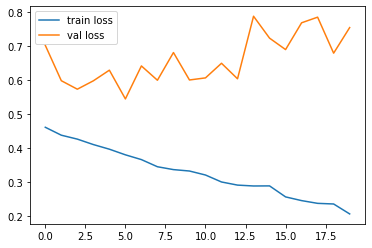

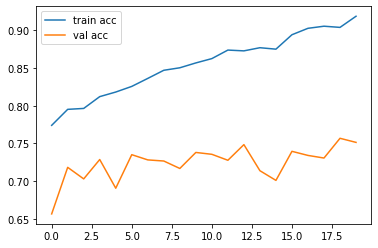

<Figure size 432x288 with 0 Axes>

In [47]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [48]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [49]:

y_pred = model.predict(test_set)


In [50]:
y_pred

array([[4.0782730e-08, 1.0000000e+00],
       [7.6554835e-01, 2.3445164e-01],
       [6.4486900e-05, 9.9993551e-01],
       ...,
       [9.5014620e-01, 4.9853809e-02],
       [2.5952756e-01, 7.4047244e-01],
       [9.9991632e-01, 8.3629180e-05]], dtype=float32)

In [51]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [52]:
y_pred

array([1, 0, 1, ..., 0, 1, 0])

In [53]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [54]:
model=load_model('model_vgg19.h5')

In [55]:
img=image.load_img('/content/drive/MyDrive/Deep Learning/CatDog/test_set/dogs/dog.4002.jpg',target_size=(224,224))



In [56]:
x=image.img_to_array(img)
x

array([[[ 25.,  24.,  22.],
        [ 25.,  24.,  22.],
        [ 24.,  23.,  21.],
        ...,
        [ 38.,  28.,  27.],
        [ 36.,  26.,  25.],
        [ 33.,  28.,  25.]],

       [[ 26.,  25.,  23.],
        [ 26.,  25.,  23.],
        [ 25.,  24.,  22.],
        ...,
        [ 38.,  28.,  27.],
        [ 36.,  26.,  25.],
        [ 34.,  29.,  26.]],

       [[ 27.,  26.,  24.],
        [ 27.,  26.,  24.],
        [ 26.,  25.,  23.],
        ...,
        [ 38.,  28.,  27.],
        [ 34.,  24.,  23.],
        [ 32.,  27.,  24.]],

       ...,

       [[ 89.,  58.,  63.],
        [ 88.,  57.,  62.],
        [ 99.,  70.,  75.],
        ...,
        [ 30.,  25.,  22.],
        [ 31.,  26.,  23.],
        [ 31.,  26.,  23.]],

       [[ 93.,  61.,  64.],
        [101.,  70.,  75.],
        [126.,  95., 101.],
        ...,
        [ 33.,  25.,  23.],
        [ 33.,  25.,  23.],
        [ 33.,  25.,  23.]],

       [[148., 116., 119.],
        [116.,  85.,  90.],
        [144., 1

In [57]:
x.shape

(224, 224, 3)

In [58]:
x=x/255

In [59]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [60]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [61]:
a=np.argmax(model.predict(img_data), axis=1)

In [66]:
if(a[0]<=0.5):
    print("Cat")
else:
    print("Dog")

Dog
